<a href="https://colab.research.google.com/github/Vashu-Garg/Adult-Dataset-Salary-Range-Prediction/blob/main/Salary_Group_Prediction(Adult_Dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Salary Prediction For Adult Dataset:-

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Prediction task is to determine whether a person makes over 50K a year.

**Variable Understanding:**

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

prediction: >50K, <=50K.


# Exploratory Data Analysis:-

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
price_pred_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Case Studies Data/adultdata_predict50Ksalary.xlsx')  
price_pred_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,prediction
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
price_pred_df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capitalgain       0
capitalloss       0
hoursperweek      0
nativecountry     0
prediction        0
dtype: int64

In [ ]:
price_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capitalgain     32561 non-null  int64 
 11  capitalloss     32561 non-null  int64 
 12  hoursperweek    32561 non-null  int64 
 13  nativecountry   32561 non-null  object
 14  prediction      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
price_pred_df.describe()

,age,fnlwgt,education-num,capitalgain,capitalloss,hoursperweek
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
for i in ['workclass','education','marital-status','occupation','relationship','race','sex']:
  print(f"length of {i}:",price_pred_df[i].nunique())
  print(price_pred_df[i].value_counts())

length of workclass: 9
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
length of education: 16
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
length of marital-status: 7
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: i

In [ ]:
price_pred_df.replace(' ?', np.NaN,inplace=True)
price_pred_df = price_pred_df.dropna()

In [ ]:
for i in ['workclass','education','marital-status','occupation','relationship','race','sex']:
  print(f"length of {i}:",price_pred_df[i].nunique())
  print(price_pred_df[i].value_counts())

length of workclass: 7
 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
length of education: 16
 HS-grad         9840
 Some-college    6678
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64
length of marital-status: 7
 Married-civ-spouse       14065
 Never-married             9726
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: marital-status, dtype: int64
length of occupation: 14
 Prof-specialty       4038
 Craft-repair

In [ ]:
price_pred_df['workclass'].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

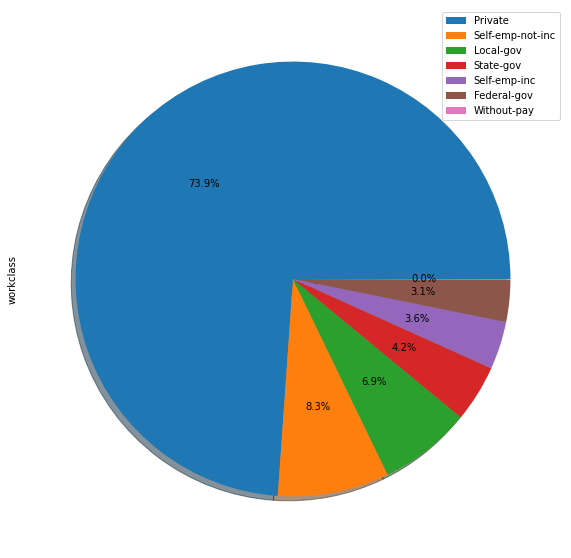

In [ ]:
# Workclass Distribution
fig,ax=plt.subplots(figsize=(15,10))
price_pred_df['workclass'].value_counts().plot.pie (autopct='%1.1f%%', ax = ax, shadow=True, labeldistance=None)
ax.legend(['Private', 'Self-emp-not-inc','Local-gov','State-gov','Self-emp-inc','Federal-gov','Without-pay','Never-worked'])
plt.show()


In [ ]:
price_pred_df['education'].value_counts()

 HS-grad         9840
 Some-college    6678
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64

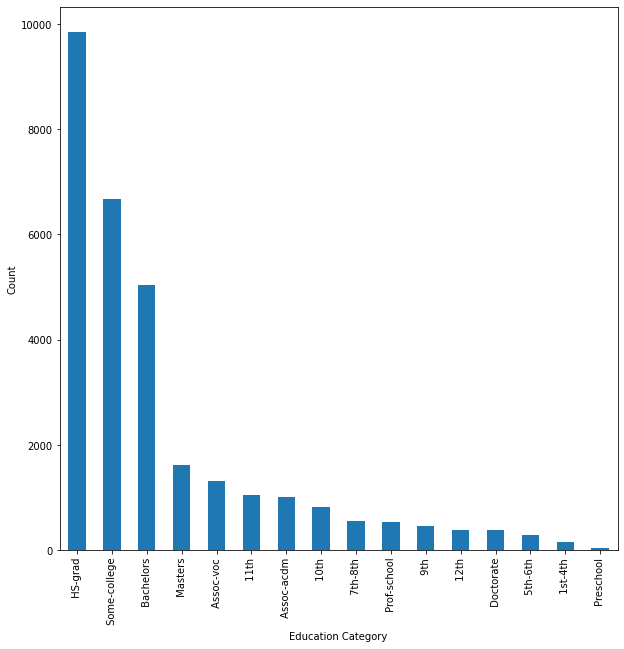

In [ ]:
# Education Distribution
fig,ax=plt.subplots(figsize=(10,10))

price_plot=price_pred_df['education'].value_counts().plot(kind='bar')
plt.xlabel('Education Category')
plt.ylabel('Count')
plt.show()
 

In [ ]:
price_pred_df['marital-status'].value_counts()

 Married-civ-spouse       14065
 Never-married             9726
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: marital-status, dtype: int64

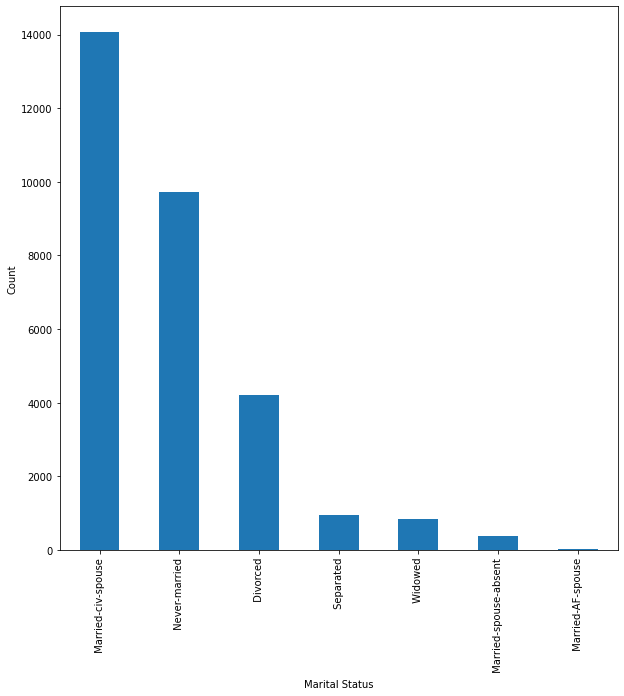

In [ ]:
# Marital Status Distribution
fig,ax=plt.subplots(figsize=(10,10))
price_plot=price_pred_df['marital-status'].value_counts().plot(kind='bar')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

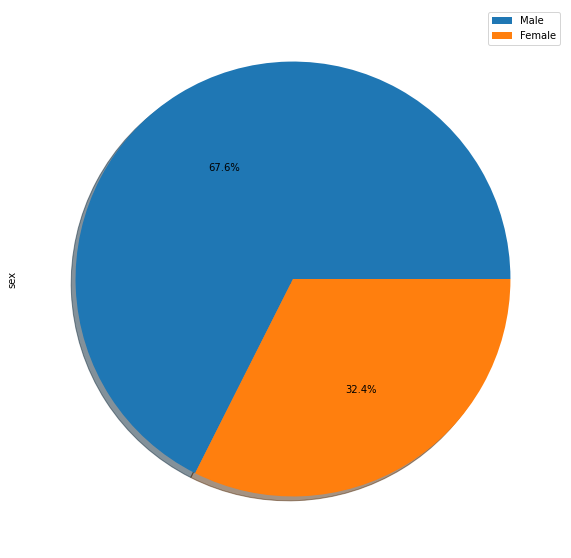

In [ ]:
# Gender Distribution
fig,ax=plt.subplots(figsize=(15,10))
price_pred_df['sex'].value_counts().plot.pie (autopct='%1.1f%%', ax = ax, shadow=True, labeldistance=None)
ax.legend(['Male', 'Female'])
plt.show()

# Feature Engineering:-

In [ ]:
price_pred_df['nativecountry'].value_counts()

 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

In [ ]:
price_pred_df['nativecountry'] = [' United States' if i == ' United-States'  else ' Out of United States' for i in price_pred_df['nativecountry']]

In [ ]:
price_pred_df['nativecountry'].value_counts()

 United States           27504
 Out of United States     2658
Name: nativecountry, dtype: int64

In [ ]:
price_pred_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,prediction
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Out of United States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United States,<=50K


In [ ]:
price_pred_df['sex'] = price_pred_df['sex'].map({' Male':1,' Female':0})
price_pred_df['nativecountry'] = price_pred_df['nativecountry'].map({' United States':1,' Out of United States':0})
price_pred_df['race'] = price_pred_df['race'].map({' White':1,' Black':2,' Asian-Pac-Islander':3,' Amer-Indian-Eskimo':4,' Other':5})
price_pred_df['marital-status'] = price_pred_df['marital-status'].map({' Married-civ-spouse':1,' Never-married':2,' Divorced':3,' Separated':4,' Widowed':5,' Married-spouse-absent':6,' Married-AF-spouse':7})
price_pred_df['relationship'] = price_pred_df['relationship'].map({' Husband':1,' Not-in-family':2,' Own-child':3,' Unmarried':4,' Wife':5,' Other-relative':6})
price_pred_df['education'] = price_pred_df['education'].map({' HS-grad':1,' Some-college':2,' Bachelors':3,' Masters':4,' Assoc-voc':5,' 11th':6,
                                                             ' Assoc-acdm':7,' 10th':8,' 7th-8th':9,' Prof-school':10,' 9th':11,' 12th':12,
                                                             ' Doctorate':13,' 5th-6th':14,' 1st-4th':15,' Preschool':16})

price_pred_df['occupation'] = price_pred_df['occupation'].map({' Prof-specialty':1,' Craft-repair':2,' Exec-managerial':3,' Adm-clerical':4,' Sales':5,' Other-service':6,
                                                             ' Machine-op-inspct':7,' Transport-moving':8,' Handlers-cleaners':9,' Farming-fishing':10,' Tech-support':11,' Protective-serv':12,
                                                             ' Priv-house-serv':13,' Armed-Forces':14})
price_pred_df['Prediction (>50k)'] = np.where(price_pred_df['prediction']==' <=50K',0,1)

In [ ]:
price_pred_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,prediction,Prediction (>50k)
0,39,State-gov,77516,3,13,2,4,2,1,1,2174,0,40,1,<=50K,0
1,50,Self-emp-not-inc,83311,3,13,1,3,1,1,1,0,0,13,1,<=50K,0
2,38,Private,215646,1,9,3,9,2,1,1,0,0,40,1,<=50K,0
3,53,Private,234721,6,7,1,9,1,2,1,0,0,40,1,<=50K,0
4,28,Private,338409,3,13,1,1,5,2,0,0,0,40,0,<=50K,0


In [ ]:
for i in ['workclass','education','marital-status','occupation','relationship','race','sex','nativecountry']:
  print(f"length of {i}:",price_pred_df[i].nunique())
  print(price_pred_df[i].value_counts())

length of workclass: 7
 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
length of education: 16
1     9840
2     6678
3     5044
4     1627
5     1307
6     1048
7     1008
8      820
9      557
10     542
11     455
12     377
13     375
14     288
15     151
16      45
Name: education, dtype: int64
length of marital-status: 7
1    14065
2     9726
3     4214
4      939
5      827
6      370
7       21
Name: marital-status, dtype: int64
length of occupation: 14
1     4038
2     4030
3     3992
4     3721
5     3584
6     3212
7     1966
8     1572
9     1350
10     989
11     912
12     644
13     143
14       9
Name: occupation, dtype: int64
length of relationship: 6
1    12463
2     7726
3     4466
4     3212
5     1406
6      889
Name: relationship, dtype: int64
length of race: 5
1    25933
2     2817
3      895
4 

In [ ]:
df=pd.get_dummies(price_pred_df['workclass'])

In [ ]:
df

,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
32556,0,0,1,0,0,0,0
32557,0,0,1,0,0,0,0
32558,0,0,1,0,0,0,0
32559,0,0,1,0,0,0,0


In [ ]:
price_pred_df.drop(columns=['workclass','fnlwgt','education-num','prediction'],axis=1,inplace=True)

In [ ]:
price_pred_df = pd.concat([price_pred_df,df],axis=1)

In [ ]:
price_pred_df.drop(columns=' Self-emp-not-inc',axis=1,inplace=True)

In [ ]:
price_pred_df.head()

,age,education,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,Prediction (>50k),Federal-gov,Local-gov,Private,Self-emp-inc,State-gov,Without-pay
0,39,3,2,4,2,1,1,2174,0,40,1,0,0,0,0,0,1,0
1,50,3,1,3,1,1,1,0,0,13,1,0,0,0,0,0,0,0
2,38,1,3,9,2,1,1,0,0,40,1,0,0,0,1,0,0,0
3,53,6,1,9,1,2,1,0,0,40,1,0,0,0,1,0,0,0
4,28,3,1,1,5,2,0,0,0,40,0,0,0,0,1,0,0,0


In [ ]:
X = price_pred_df.drop(['Prediction (>50k)'],axis=1)
Y = price_pred_df['Prediction (>50k)']

# Models Implementation:-

In [ ]:
X_train1, X_test1, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
sc = StandardScaler()
  
X_train = sc.fit_transform(X_train1)
X_test = sc.transform(X_test1)

In [ ]:
X_train

array([[-0.34298906, -0.44917237,  0.11768806, ..., -0.19224735,
        -0.20706291, -0.02230637],
       [ 0.94971743, -0.76312852,  1.04086598, ..., -0.19224735,
        -0.20706291, -0.02230637],
       [ 0.87367587, -0.76312852,  2.88722181, ..., -0.19224735,
        -0.20706291, -0.02230637],
       ...,
       [ 0.87367587, -0.13521623,  1.04086598, ..., -0.19224735,
        -0.20706291, -0.02230637],
       [ 0.79763432, -0.13521623, -0.80548985, ..., -0.19224735,
        -0.20706291, -0.02230637],
       [-0.34298906, -0.76312852,  1.04086598, ..., -0.19224735,
        -0.20706291, -0.02230637]])

In [ ]:
X_test

array([[ 0.41742652, -0.76312852,  0.11768806, ..., -0.19224735,
        -0.20706291, -0.02230637],
       [-1.33152932, -0.44917237,  0.11768806, ..., -0.19224735,
        -0.20706291, -0.02230637],
       [-0.19090594, -0.44917237, -0.80548985, ..., -0.19224735,
        -0.20706291, -0.02230637],
       ...,
       [ 0.49346808,  1.43456452, -0.80548985, ..., -0.19224735,
        -0.20706291, -0.02230637],
       [ 0.18930185, -0.44917237, -0.80548985, ..., -0.19224735,
        -0.20706291, -0.02230637],
       [-1.02736308, -0.13521623,  0.11768806, ..., -0.19224735,
        -0.20706291, -0.02230637]])

### Principal Component Analysis (Dimentionality Reduction):-

In [ ]:
# I also have used PCA but my all the models are working on original features because of result accuracy. if you want to use the uncomment below statements...
# from sklearn.decomposition import PCA
# pca = PCA(n_components=6)
# pca.fit(X)
# X_train = pca.fit_transform(X_train)
# X_test = pca.fit_transform(X_test)
# print("original shape:   ", X_train1.shape)
# print("transformed shape:", X_train.shape)

In [ ]:
#creating list of matrix to store the Accuracy of all model
Accuracy_of_models = []
Model_Names = []

## Logistic Classifier:-

In [ ]:
from sklearn.linear_model import LogisticRegression  
log_classfier = LogisticRegression(random_state = 0)
log_classfier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
log_preds = log_classfier.predict(X_test)

In [ ]:
accuracy_lr = float(np.sum(log_preds==y_test))/y_test.shape[0]
Accuracy_of_models.append(accuracy_lr)
Model_Names.append("Logistic Regression")
print("accuracy: %f" % (accuracy_lr))

accuracy: 0.807890


In [ ]:
from sklearn.metrics import classification_report
print('Classification report for Logistic Regression (Test set)= ')
print( classification_report(log_preds, y_test))

Classification report for Logistic Regression (Test set)= 
              precision    recall  f1-score   support

           0       0.93      0.83      0.88      5101
           1       0.42      0.68      0.52       932

    accuracy                           0.81      6033
   macro avg       0.68      0.76      0.70      6033
weighted avg       0.86      0.81      0.82      6033



In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
#Generate the confusion matrix
cf_matrix_log = confusion_matrix(y_test,log_preds)

print(cf_matrix_log)

[[4237  295]
 [ 864  637]]


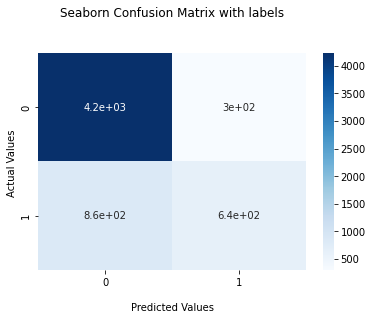

In [ ]:
ax = sns.heatmap(cf_matrix_log, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1])
ax.yaxis.set_ticklabels([0,1])

## Display the visualization of the Confusion Matrix.
plt.show()

## Random Forest Classifier:-

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# taking 300 trees
rf = RandomForestClassifier(n_estimators=300)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [ ]:
rf_y_pred_test = rf.predict(X_test)
accuracy_rf= accuracy_score(y_test, rf_y_pred_test)
Accuracy_of_models.append(accuracy_lr)
Model_Names.append("Random Forest")
accuracy_rf

0.8426984916293718

In [ ]:
print("accuracy: %f" % (accuracy_rf))

accuracy: 0.842698


In [ ]:
print('Classification report for Random Forest Classifier (Test set)= ')
print( classification_report(rf_y_pred_test, y_test))

Classification report for Random Forest Classifier (Test set)= 
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      4743
           1       0.61      0.71      0.66      1290

    accuracy                           0.84      6033
   macro avg       0.77      0.80      0.78      6033
weighted avg       0.85      0.84      0.85      6033



In [ ]:
#Generate the confusion matrix
cf_matrix_log = confusion_matrix(y_test,rf_y_pred_test)

print(cf_matrix_log)

[[4163  369]
 [ 580  921]]


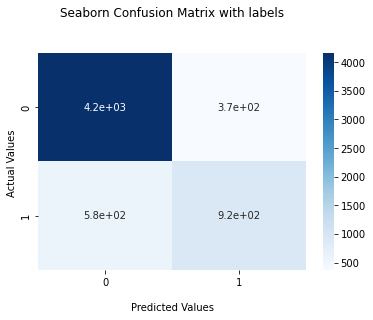

In [ ]:
ax = sns.heatmap(cf_matrix_log, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1])
ax.yaxis.set_ticklabels([0,1])

## Display the visualization of the Confusion Matrix.
plt.show()

## Random Forest Using Hyperparameter Tuning:-

In [ ]:
rfc=RandomForestClassifier(random_state=42)

In [ ]:
param_grid = { 
    'n_estimators': [50,100,150],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5,7,9],
    'criterion' :['gini', 'entropy']
}

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150]})

In [ ]:
CV_rfc_y_pred_test = CV_rfc.predict(X_test)
accuracy_CV_rfc= accuracy_score(y_test, CV_rfc_y_pred_test)
Accuracy_of_models.append(accuracy_CV_rfc)
Model_Names.append("RF CV")

In [ ]:
X_test[0]

array([ 0.41742652, -0.76312852,  0.11768806,  0.07285533, -0.15410461,
        2.93337006, -1.43923952, -0.14812396, -0.22028999, -0.07997314,
        0.31180377, -0.17873906, -0.27189587,  0.59220379, -0.19224735,
       -0.20706291, -0.02230637])

In [ ]:
print("accuracy: %f" % (accuracy_CV_rfc))

accuracy: 0.854633


In [ ]:
print('Classification report for Random Forest Classifier (Test set)= ')
print( classification_report(CV_rfc_y_pred_test, y_test))

Classification report for Random Forest Classifier (Test set)= 
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      5019
           1       0.55      0.81      0.65      1014

    accuracy                           0.85      6033
   macro avg       0.75      0.84      0.78      6033
weighted avg       0.89      0.85      0.87      6033



In [ ]:
#Generate the confusion matrix
cf_matrix_rfc_cv = confusion_matrix(y_test,CV_rfc_y_pred_test)

print(cf_matrix_rfc_cv)

[[4337  195]
 [ 682  819]]


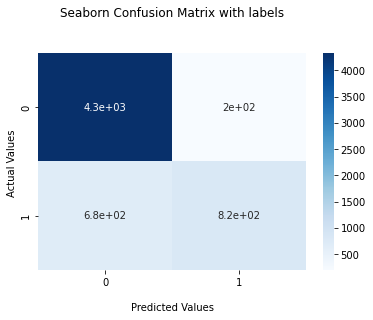

In [ ]:
ax = sns.heatmap(cf_matrix_rfc_cv, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1])
ax.yaxis.set_ticklabels([0,1])

## Display the visualization of the Confusion Matrix.
plt.show()

## Decision Tree Classifier:-

In [ ]:
# Applying Decision Tree

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5, random_state=0)
dtc.fit(X_train, y_train)

# dtc = DecisionTreeClassifier(max_depth = 5)
# dtc.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5, random_state=0)

In [ ]:
dtc_y_pred_test = dtc.predict(X_test)
accuracy_CV_dtc= accuracy_score(y_test, dtc_y_pred_test)
Accuracy_of_models.append(accuracy_CV_dtc)
Model_Names.append("Decision Tree")

In [ ]:
print("accuracy: %f" % (accuracy_CV_dtc))

accuracy: 0.797447


In [ ]:
print('Classification report for Decision Tree Classifier (Test set)= ')
print( classification_report(dtc_y_pred_test, y_test))

Classification report for Decision Tree Classifier (Test set)= 
              precision    recall  f1-score   support

           0       1.00      0.79      0.88      5750
           1       0.19      0.99      0.32       283

    accuracy                           0.80      6033
   macro avg       0.59      0.89      0.60      6033
weighted avg       0.96      0.80      0.85      6033



In [ ]:
#Generate the confusion matrix
cf_matrix_dtc = confusion_matrix(y_test,dtc_y_pred_test)

print(cf_matrix_dtc)

[[4530    2]
 [1220  281]]


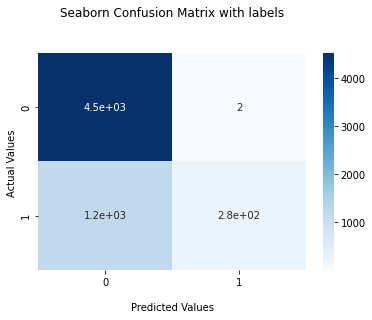

In [ ]:
ax = sns.heatmap(cf_matrix_dtc, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1])
ax.yaxis.set_ticklabels([0,1])

## Display the visualization of the Confusion Matrix.
plt.show()

## XG-Boost Classifier:-

In [ ]:
# Applying XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth = 5, learning_rate = 0.1)
xgb.fit(X_train, y_train)

XGBClassifier(max_depth=5)

In [ ]:
xgb_y_pred_test = dtc.predict(X_test)
accuracy_CV_xgb= accuracy_score(y_test, xgb_y_pred_test)
Accuracy_of_models.append(accuracy_CV_xgb)
Model_Names.append("XG Boost")

In [ ]:
print("accuracy: %f" % (accuracy_CV_xgb))

accuracy: 0.797447


In [ ]:
print('Classification report for XG Boost Classifier (Test set)= ')
print( classification_report(xgb_y_pred_test, y_test))

Classification report for XG Boost Classifier (Test set)= 
              precision    recall  f1-score   support

           0       1.00      0.79      0.88      5750
           1       0.19      0.99      0.32       283

    accuracy                           0.80      6033
   macro avg       0.59      0.89      0.60      6033
weighted avg       0.96      0.80      0.85      6033



In [ ]:
#Generate the confusion matrix
cf_matrix_xgb = confusion_matrix(y_test,xgb_y_pred_test)

print(cf_matrix_xgb)

[[4530    2]
 [1220  281]]


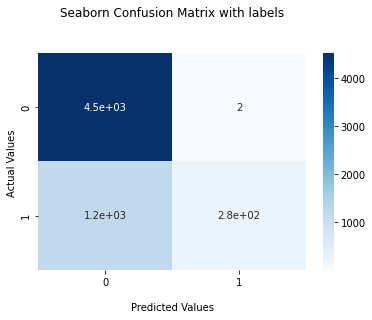

In [ ]:
ax = sns.heatmap(cf_matrix_xgb, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1])
ax.yaxis.set_ticklabels([0,1])

## Display the visualization of the Confusion Matrix.
plt.show()

## KNN (K-Nearest Neighbour):-

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
knn_y_pred_test = knn.predict(X_test)
accuracy_CV_knn= accuracy_score(y_test, knn_y_pred_test)
Accuracy_of_models.append(accuracy_CV_knn)
Model_Names.append("KNN")

In [ ]:
print("accuracy: %f" % (accuracy_CV_knn))

accuracy: 0.829107


In [ ]:
print('Classification report for KNN Classifier (Test set)= ')
print( classification_report(knn_y_pred_test, y_test))

Classification report for KNN Classifier (Test set)= 
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      4761
           1       0.58      0.68      0.63      1272

    accuracy                           0.83      6033
   macro avg       0.75      0.78      0.76      6033
weighted avg       0.84      0.83      0.83      6033



In [ ]:
#Generate the confusion matrix
cf_matrix_knn = confusion_matrix(y_test,knn_y_pred_test)

print(cf_matrix_knn)

[[4131  401]
 [ 630  871]]


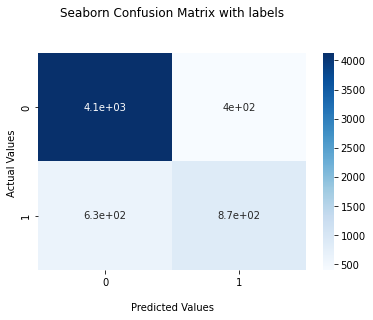

In [ ]:
ax = sns.heatmap(cf_matrix_knn, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1])
ax.yaxis.set_ticklabels([0,1])

## Display the visualization of the Confusion Matrix.
plt.show()

## Naive Bayes Classifier:-

In [ ]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB().fit(X_train,y_train)

In [ ]:
NB_y_pred_test = dtc.predict(X_test)
accuracy_CV_NB= accuracy_score(y_test, NB_y_pred_test)
Accuracy_of_models.append(accuracy_CV_NB)
Model_Names.append("Naive Bayes")

In [ ]:
print("accuracy: %f" % (accuracy_CV_NB))

accuracy: 0.797447


In [ ]:
print('Classification report for Naive Bayes Classifier (Test set)= ')
print( classification_report(NB_y_pred_test, y_test))

Classification report for Naive Bayes Classifier (Test set)= 
              precision    recall  f1-score   support

           0       1.00      0.79      0.88      5750
           1       0.19      0.99      0.32       283

    accuracy                           0.80      6033
   macro avg       0.59      0.89      0.60      6033
weighted avg       0.96      0.80      0.85      6033



In [ ]:
#Generate the confusion matrix
cf_matrix_NB = confusion_matrix(y_test,NB_y_pred_test)

print(cf_matrix_NB)

[[4530    2]
 [1220  281]]


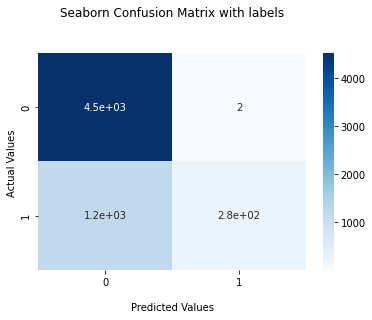

In [ ]:
ax = sns.heatmap(cf_matrix_NB, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1])
ax.yaxis.set_ticklabels([0,1])

## Display the visualization of the Confusion Matrix.
plt.show()

## Support Vector Machine:-

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
svm = svm.SVC(decision_function_shape='ovo')
svm_model = svm.fit(X_train,y_train)

In [ ]:
SVM_y_pred_test = svm_model.predict(X_test)
accuracy_CV_SVM= accuracy_score(y_test, SVM_y_pred_test)
Accuracy_of_models.append(accuracy_CV_SVM)
Model_Names.append("SVM")

In [ ]:
print("accuracy: %f" % (accuracy_CV_SVM))

accuracy: 0.830101


In [ ]:
print('Classification report for SVM Classifier (Test set)= ')
print( classification_report(SVM_y_pred_test, y_test))

Classification report for SVM Classifier (Test set)= 
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      4953
           1       0.52      0.72      0.60      1080

    accuracy                           0.83      6033
   macro avg       0.73      0.79      0.75      6033
weighted avg       0.86      0.83      0.84      6033



In [ ]:
#Generate the confusion matrix
cf_matrix_SVM = confusion_matrix(y_test,SVM_y_pred_test)

print(cf_matrix_SVM)

[[4230  302]
 [ 723  778]]


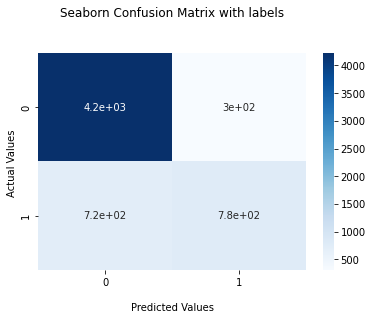

In [ ]:
ax = sns.heatmap(cf_matrix_SVM, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1])
ax.yaxis.set_ticklabels([0,1])

## Display the visualization of the Confusion Matrix.
plt.show()

## Light-GBM Model:-

In [ ]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)

LGBMClassifier()

In [ ]:
lgbm_y_pred_test = lgbm.predict(X_test)
accuracy_lgbm= accuracy_score(y_test, lgbm_y_pred_test)
Accuracy_of_models.append(accuracy_lgbm)
Model_Names.append("Light-GBM")

In [ ]:
print("accuracy: %f" % (accuracy_lgbm))

accuracy: 0.868059


In [ ]:
print('Classification report for SVM Classifier (Test set)= ')
print( classification_report(lgbm_y_pred_test, y_test))

Classification report for SVM Classifier (Test set)= 
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      4800
           1       0.65      0.79      0.71      1233

    accuracy                           0.87      6033
   macro avg       0.79      0.84      0.81      6033
weighted avg       0.88      0.87      0.87      6033



In [ ]:
#Generate the confusion matrix
cf_matrix_lgbm = confusion_matrix(y_test,lgbm_y_pred_test)

print(cf_matrix_lgbm)

[[4268  264]
 [ 532  969]]


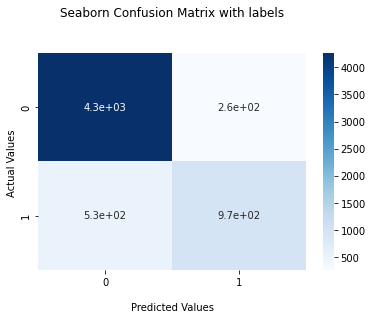

In [ ]:
ax = sns.heatmap(cf_matrix_lgbm, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1])
ax.yaxis.set_ticklabels([0,1])

## Display the visualization of the Confusion Matrix.
plt.show()

## All Models Outcome:-

In [ ]:
Models_Accuracy = pd.DataFrame(list(zip(Model_Names, Accuracy_of_models)),columns =['Models', 'Accuracy']).sort_values('Accuracy')

In [ ]:
Models_Accuracy

,Models,Accuracy
3,Decision Tree,0.797447
4,XG Boost,0.797447
6,Naive Bayes,0.797447
0,Logistic Regression,0.807890
1,Random Forest,0.807890
5,KNN,0.829107
7,SVM,0.830101
2,RF CV,0.854633
8,Light-GBM,0.868059


<BarContainer object of 9 artists>

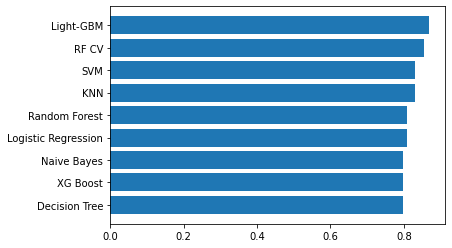

In [ ]:
plt.barh(Models_Accuracy['Models'],Models_Accuracy['Accuracy'])

# Conclusion:-

In this Adult Dataset i have to predict the Dependent Variables (Salary Classes Either >50k or <=50K) from the given Independent Variables. For that i used multiple models(Logistic Regression,KNN,SVM and Ensemble Learning) and also used Hyperparameter Tuning (Grid Search CV). In all the models we got 86.80% accuracy using Light GBM Model.